# Loading the dataset

In [ ]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

# CNN Architecture

In [10]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D,Dropout,BatchNormalization

model=Sequential()

model.add(Conv2D(256,(3,3),input_shape=data.shape[1:]))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [11]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.2)

# Data Augmentation

In [12]:
from keras.preprocessing.image import ImageDataGenerator

aug = ImageDataGenerator(rotation_range=20,zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15,
                         horizontal_flip=True,fill_mode="nearest")

# Training the model

In [13]:
history=model.fit(aug.flow(train_data,train_target,batch_size=32),epochs=20)

Epoch 1/20
624/624 [==============================] - 167s 266ms/step - loss: 0.6906 - accuracy: 0.5959
Epoch 2/20
624/624 [==============================] - 161s 259ms/step - loss: 0.6265 - accuracy: 0.6440
Epoch 3/20
624/624 [==============================] - 160s 257ms/step - loss: 0.6068 - accuracy: 0.6695
Epoch 4/20
624/624 [==============================] - 159s 255ms/step - loss: 0.5955 - accuracy: 0.6756
Epoch 5/20
624/624 [==============================] - 166s 266ms/step - loss: 0.5862 - accuracy: 0.6878
Epoch 6/20
624/624 [==============================] - 183s 294ms/step - loss: 0.5719 - accuracy: 0.7019
Epoch 7/20
624/624 [==============================] - 181s 290ms/step - loss: 0.5635 - accuracy: 0.7068
Epoch 8/20
624/624 [==============================] - 187s 300ms/step - loss: 0.5503 - accuracy: 0.7184
Epoch 9/20
624/624 [==============================] - 191s 306ms/step - loss: 0.5413 - accuracy: 0.7271
Epoch 10/20
624/624 [==============================] - 189s 303m

# Plotting the loss and the accuracy

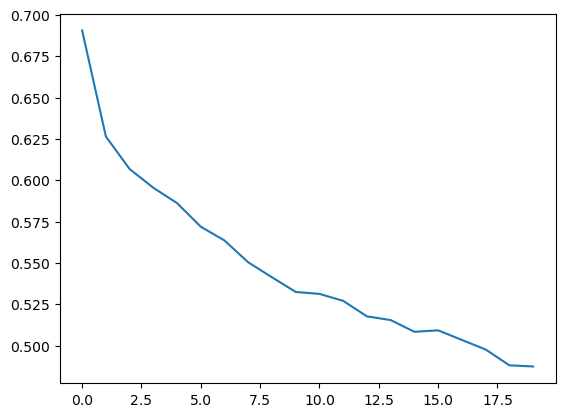

In [14]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])

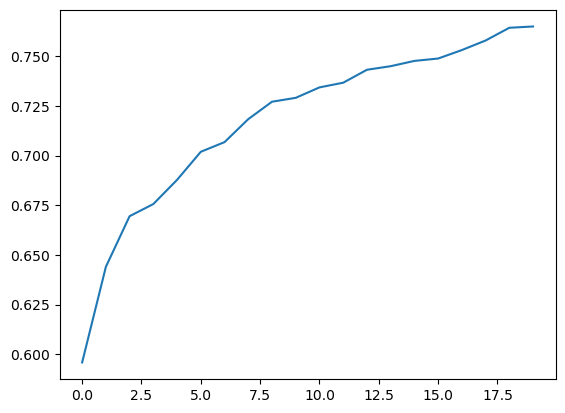

In [15]:
plt.plot(history.history['accuracy'])

# Evaluating the model using testing data

In [16]:
print(model.evaluate(test_data,test_target))

156/156 [==============================] - 10s 61ms/step - loss: 0.4414 - accuracy: 0.7846
[0.441425085067749, 0.7845691442489624]


In [17]:
predicted_target=model.predict(test_data)

156/156 [==============================] - 10s 60ms/step


In [18]:
from sklearn.metrics import classification_report
classification_report(np.argmax(test_target,axis=1),np.argmax(predicted_target,axis=1))

'              precision    recall  f1-score   support\n\n           0       0.90      0.64      0.75      2501\n           1       0.72      0.93      0.81      2489\n\n    accuracy                           0.78      4990\n   macro avg       0.81      0.78      0.78      4990\nweighted avg       0.81      0.78      0.78      4990\n'

In [55]:
predicted_target[:10]

array([[0.35415885, 0.6458411 ],
       [0.05434783, 0.9456522 ],
       [0.7602037 , 0.23979631],
       [0.78183466, 0.21816537],
       [0.62658745, 0.37341255],
       [0.2917736 , 0.7082264 ],
       [0.68112916, 0.31887087],
       [0.61653876, 0.38346127],
       [0.0947453 , 0.9052547 ],
       [0.88329065, 0.11670934]], dtype=float32)

In [56]:
label=np.argmax(predicted_target,axis=1)[0:10]
label

array([1, 1, 0, 0, 0, 1, 0, 0, 1, 0], dtype=int64)